## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## *Please answer questions within their designated section and in the order they are asked to maintain clarity and organization. You can add new code and text blocks if you want.*

## **Setup** 🔧

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd /content/drive/MyDrive/courses/cse519/homework2

/content/drive/MyDrive/courses/cse519/homework2


# Download data from Kaggle 📥

In [ ]:
!pip install -q kaggle

In [ ]:
# Go to your Kaggle account and navigate to your account settings (click on your profile picture -> "Account").
# Scroll down to the "API" section and click "Create New API Token." This will download a kaggle.json file containing your API key.
# In your Colab notebook, run the following code to upload the kaggle.json file
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c zillow-prize-1


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 63, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1037, in competition_download_cli
    self.competition_download_files(competition, path, force,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1000, in competition_download_files
    url = response.retries.history[0].redirect_location.split('?')[0]
IndexError: tuple index out of range


# Alternate: download data using gdown (if having issues with Kaggle) 📁

In [ ]:
! pip install gdown

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=15Ap7c-LehMzMYpv3WIWbja1Mns_BTYgQ'
gdown.download(url)

Downloading...
From (original): https://drive.google.com/uc?id=15Ap7c-LehMzMYpv3WIWbja1Mns_BTYgQ
From (redirected): https://drive.google.com/uc?id=15Ap7c-LehMzMYpv3WIWbja1Mns_BTYgQ&confirm=t&uuid=29277410-47c1-434f-a9f3-75f79f93e95e
To: /content/drive/MyDrive/courses/cse519/homework2/zillow-prize-1.zip
100%|██████████| 356M/356M [00:04<00:00, 79.7MB/s]


'zillow-prize-1.zip'

# Extract data and install packages (regardless of data acquisition method) 🚀

In [ ]:
!unzip zillow-prize-1.zip

In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


## **Library and Data Imports**
- Import your libraries and the data here

In [ ]:
### TODO: Load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



## **Q1: House Desirability Scoring and Ranking (10 Points)**


**Ans)**I have merged the properties datasset of 2016 and 2017. Because as mentioned in the kaggle that updated featured are present in 2017 for 2016 dataset.And inititated Building Scoring and Ranking Functions.To do so i have used the following features and the reasons are:


**Taxvaluedollarcnt**: Tax-assessed value serves as a proxy for market value, directly influencing desirability.

**Calculatedfinishedsquarefeet**: Larger homes tend to be more desirable, especially for families.

**lotsizesquarefeet**: Lot size can indicate available outdoor space, which is important for certain buyers.

**Bathroomcnt** and **bedroomcnt**: More rooms add utility to the property, making it more functional for larger families or guests.

initially i have considered few other features, like regionidcity but i have oserved most of them was not-diverse and is not making any sense.So I have dropped after considering the features.

1)I have then normalized above selected features and assigned some weights to them so that the features contribute accordingly to the desired Score.and then Sorted the top 10 desired properties and least desired properties.

In [ ]:

# Load both datasets
properties_2016 = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/properties_2016.csv')
properties_2017 = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/properties_2017.csv')

In [ ]:
all_equal = (properties_2016['parcelid'] == properties_2017['parcelid']).all()
print(all_equal)


False


In [ ]:
# Merging the datasets using 'parcelid' as the key
updated_properties = pd.merge(properties_2016, properties_2017, on='parcelid', how='outer', suffixes=('_2016', '_2017'))


**Updating 2016 Dataset**

In [ ]:
for col in properties_2016.columns:
    if col != 'parcelid':  # Skip the 'parcelid' column
        col_2017 = col + '_2017'  # Corresponding column from 2017 dataset
        updated_properties[col] = updated_properties[col + '_2016'].combine_first(updated_properties[col_2017])

# 2. Drop the extra '_2016' and '_2017' columns, as we have already combined them
updated_properties = updated_properties[properties_2016.columns]

In [ ]:
# Display the first few rows of the updated dataset
updated_properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10711725,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,NaN,NaN,183000.0,615000.0,2015.0,432000.0,8625.75,NaN,NaN,6.037113e+13
1,10711726,1.0,NaN,NaN,3.0,5.0,NaN,4.0,3.0,NaN,...,NaN,NaN,217167.0,531642.0,2015.0,314475.0,6722.67,NaN,NaN,6.037113e+13
2,10711727,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,NaN,...,NaN,NaN,195295.0,328148.0,2015.0,132853.0,4160.63,NaN,NaN,6.037113e+13
3,10711728,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,NaN,NaN,188384.0,297377.0,2015.0,108993.0,3883.47,NaN,NaN,6.037113e+13
4,10711729,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,NaN,NaN,178238.0,297001.0,2015.0,118763.0,3884.27,NaN,NaN,6.037113e+13


In [ ]:
# If needed, save the updated dataset to a CSV file
updated_properties.to_csv('updated_properties_2016.csv', index=False)

NameError: name 'updated_properties' is not defined

In [ ]:
updated_properties = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/updated_properties_2016.csv')
updated_properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10711725,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,NaN,NaN,183000.0,615000.0,2015.0,432000.0,8625.75,NaN,NaN,6.037113e+13
1,10711726,1.0,NaN,NaN,3.0,5.0,NaN,4.0,3.0,NaN,...,NaN,NaN,217167.0,531642.0,2015.0,314475.0,6722.67,NaN,NaN,6.037113e+13
2,10711727,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,NaN,...,NaN,NaN,195295.0,328148.0,2015.0,132853.0,4160.63,NaN,NaN,6.037113e+13
3,10711728,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,NaN,NaN,188384.0,297377.0,2015.0,108993.0,3883.47,NaN,NaN,6.037113e+13
4,10711729,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,NaN,NaN,178238.0,297001.0,2015.0,118763.0,3884.27,NaN,NaN,6.037113e+13


**Checking for Nan Values**

In [ ]:


features_to_check = ['taxvaluedollarcnt', 'calculatedfinishedsquarefeet',
                     'lotsizesquarefeet', 'bathroomcnt', 'bedroomcnt',
                     ]

# Check for null values in selected features
null_counts = updated_properties[features_to_check].isnull().sum()

# Display the count of null values for each feature
print("Count of Null Values in Selected Features:")
print(null_counts)

# Total number of rows in the DataFrame
total_rows = updated_properties.shape[0]
print("\nTotal Rows Available:", total_rows)

# Calculate the percentage of missing data for each feature
missing_percentage = (null_counts / total_rows) * 100

# Display the percentage of missing data
print("\nPercentage of Missing Data:")
print(missing_percentage)


Count of Null Values in Selected Features:
taxvaluedollarcnt                 0
calculatedfinishedsquarefeet    201
lotsizesquarefeet               203
bathroomcnt                       0
bedroomcnt                        0
dtype: int64

Total Rows Available: 32575

Percentage of Missing Data:
taxvaluedollarcnt               0.000000
calculatedfinishedsquarefeet    0.617038
lotsizesquarefeet               0.623177
bathroomcnt                     0.000000
bedroomcnt                      0.000000
dtype: float64


**Removing Naan values**

In [ ]:

# Drop rows with any missing values in the specified features
temp=updated_properties.shape
updated_properties.dropna(subset=features_to_check,inplace=True)
df_cleaned = updated_properties.copy()
# Check the shape of the cleaned DataFrame
print("Original DataFrame shape:", temp)
print("Cleaned DataFrame shape:", df_cleaned.shape)

# Optional: Display the number of rows removed
rows_removed = temp[0] - df_cleaned.shape[0]
print("Number of rows removed:", rows_removed)

Original DataFrame shape: (32575, 58)
Cleaned DataFrame shape: (32178, 58)
Number of rows removed: 397


**Normalizing data**

In [ ]:

scaler = MinMaxScaler()
df_cleaned[features_to_check] = scaler.fit_transform(df_cleaned[features_to_check])



In [ ]:

def compute_desirability_score(row):
    score = 0
    # Weighted sum of normalized features
    score += 0.325 * row['taxvaluedollarcnt']
    score += 0.275 * row['calculatedfinishedsquarefeet']
    score += 0.175 * row['lotsizesquarefeet']
    score += 0.125 * row['bathroomcnt']
    score += 0.10 * row['bedroomcnt']
    return score

# Apply the scoring function to each row
df_cleaned['desirability_score'] = df_cleaned.apply(compute_desirability_score, axis=1)



In [ ]:
# Sorting the DataFrame by the desirability score
df_sorted = df_cleaned.sort_values(by='desirability_score', ascending=False)

top_10_desirable = df_sorted.head(10)

bottom_10_desirable = df_sorted.tail(10)

# Displaying the top and bottom 10 houses
print("Top 10 Most Desirable Houses:\n", top_10_desirable[['parcelid', 'desirability_score','taxvaluedollarcnt']])
print("\nBottom 10 Least Desirable Houses:\n", bottom_10_desirable[['parcelid', 'desirability_score','taxvaluedollarcnt']])


Top 10 Most Desirable Houses:
        parcelid  desirability_score  taxvaluedollarcnt
23458  10736912            0.693583           1.000000
23396  10736833            0.481723           0.368174
23957  10737546            0.477926           0.453569
23952  10737540            0.472620           0.596609
24479  10738097            0.467070           0.386291
23431  10736881            0.456682           0.206649
24478  10738096            0.419838           0.364145
24474  10738092            0.406852           0.406893
23440  10736891            0.405491           0.368759
23432  10736882            0.402002           0.402531

Bottom 10 Least Desirable Houses:
        parcelid  desirability_score  taxvaluedollarcnt
18298  10731376            0.006030           0.006046
17922  10730954            0.004837           0.004116
1488   10713620            0.004681           0.000696
18024  10731068            0.004092           0.005397
1309   10713128            0.003939           0.00092

## **Q2: Pairwise Distance Function for Property Similarity (10 Points)**


**Define a house “pairwise distance function”, which measures the similarity of two properties. Like a distance metric, similar pairs of very similar properties should bedistance near zero, with distance increasing as the properties grow more dissimilar.Experiment with your distance function, and present your evaluation of how well youthink it worked. Your function should include geographic as well as property-specific variables. (10%)**

Ans)
To define a house "pairwise distance function" that measures the similarity of two properties, I have used a combination of geographic and property-specific variables.

**1)**To Build the Pairwise Distance Function I have selected the following features:

Geographic Variables:
latitude, longitude to calculate geodesic distance between the properties

Property-Specific Variables:
calculatedfinishedsquarefeet: Size of the property.
bedroomcnt: Number of bedrooms.
bathroomcnt: Number of bathrooms.
yearbuilt: The year the house was built.
taxvaluedollarcnt: Tax assessed value of the property.
lotsizesquarefeet

**2)**Since the features are on different scales (e.g., square footage is in thousands while the number of bedrooms is typically a single digit) I have normalized data

**3)**After getting enough data i have opted out to give equal weightage to both geographic data and property related data.and then calculated data for pair of properties.



In [ ]:
def house_pairwise_distance(house1, house2, weights, feature_scaler=None,max_geo_distance=1):
    # Geographic distance calculation using latitude and longitude
    geo_coords1 = (house1['latitude'], house1['longitude'])
    geo_coords2 = (house2['latitude'], house2['longitude'])

    # Calculate the geographic distance (in kilometers)
    d_geo = geodesic(geo_coords1, geo_coords2).km/max_geo_distance
    #print('Distance'+str(distance))

    # Property-specific distances
    property_features1 = np.array([house1['calculatedfinishedsquarefeet'],
                                   house1['bedroomcnt'],
                                   house1['bathroomcnt'],
                                   house1['taxvaluedollarcnt'],
                                   house1['yearbuilt'],house1['lotsizesquarefeet']])

    property_features2 = np.array([house2['calculatedfinishedsquarefeet'],
                                   house2['bedroomcnt'],
                                   house2['bathroomcnt'],
                                   house2['taxvaluedollarcnt'],
                                   house2['yearbuilt'],house2['lotsizesquarefeet']])

    # Normalize the property-specific features if a scaler is provided
    if feature_scaler:
        property_features1 = feature_scaler.transform([property_features1])[0]
        property_features2 = feature_scaler.transform([property_features2])[0]

    # Calculate the absolute difference for property-specific features
    d_property = np.sum(np.abs(property_features1 - property_features2))

    # Combine the geographic and property distances using weights
    d_total = weights['geo'] * d_geo + weights['property'] * d_property

    return d_total

In [ ]:
distance_dataframe= updated_properties[['parcelid', 'latitude', 'longitude', 'lotsizesquarefeet','calculatedfinishedsquarefeet',
        'bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'yearbuilt']]  #null values have been cleared yearrbuilt should be cleared

null_counts = distance_dataframe[['parcelid','latitude', 'longitude','yearbuilt']].isnull().sum()

distance_dataframe.dropna(subset=['yearbuilt'], inplace=True)

distance_dataframe['latitude'] = distance_dataframe['latitude'] / 1e6
distance_dataframe['longitude'] = distance_dataframe['longitude'] / 1e6

house1 = distance_dataframe.iloc[0]
house2 = distance_dataframe.iloc[1]
house3 = distance_dataframe.iloc[40]

# Weights for geographic and property-specific distances
weights = {'geo': 0.2, 'property': 0.8}

# Normalize the property-specific features across all houses
all_property_features = distance_dataframe[['calculatedfinishedsquarefeet',
                                     'bedroomcnt',
                                     'bathroomcnt',
                                     'taxvaluedollarcnt',
                                     'yearbuilt', 'lotsizesquarefeet']].values
feature_scaler = MinMaxScaler()
feature_scaler.fit(all_property_features)

# # Calculate pairwise distance between the two selected houses
distance1 = house_pairwise_distance(house1, house2, weights, feature_scaler)
distance2 = house_pairwise_distance(house3, house2, weights, feature_scaler)
print(f"Pairwise Distance between Property {int(house1['parcelid'])} and Property {int(house2['parcelid'])}: {distance1}")
print(f"Pairwise Distance between Property {int(house3['parcelid'])} and Property {int(house2['parcelid'])}: {distance2}")

Pairwise Distance between Property 10711725 and Property 10711726: 0.10751281397331612
Pairwise Distance between Property 10711765 and Property 10711726: 0.37563027251584186


**Observed that (10711725,10711726)are more close when compared to (10711765,10711726)**

## **Q3: Clustering Properties Using Distance Metrics (15 Points)**


**Using your distance function and an appropriate clustering algorithm (presumably k-means or DBScan), cluster the houses using your distance function into 10 to 100 classes, as you see best. Present a dot-plot/map (with tiny dots colored to reflect the clustering) illustrating the clusters your method produced. Give a discussion/analysis of what your clusters seem to be capturing, and how well they work. (15%)**

In [ ]:
distance_dataframe1= updated_properties[['parcelid', 'latitude', 'longitude', 'lotsizesquarefeet','calculatedfinishedsquarefeet',
        'bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'yearbuilt']]  #null values have been cleared yearrbuilt should be cleared

distance_dataframe_sample = distance_dataframe1.sample(n=500, random_state=42).reset_index(drop=True)
# Drop missing values
distance_dataframe_sample.dropna(inplace=True)

# Convert latitude and longitude to decimal degrees
distance_dataframe_sample['latitude'] = distance_dataframe_sample['latitude'] / 1e6
distance_dataframe_sample['longitude'] = distance_dataframe_sample['longitude'] / 1e6


# Step 3: Create a distance matrix using the custom distance function
n_houses1 = len(distance_dataframe_sample)
distance_matrix1 = np.zeros((n_houses1, n_houses1))

weights = {'geo': 0.5, 'property': 0.5}
geo_coords = distance_dataframe_sample[['latitude', 'longitude']].values
max_geo_distance = 0

for i in range(len(geo_coords)):
    for j in range(i + 1, len(geo_coords)):
        dist = geodesic(geo_coords[i], geo_coords[j]).km
        if dist > max_geo_distance:
            max_geo_distance = dist

for i in range(n_houses1):
    for j in range(i + 1, n_houses1):
        distance = house_pairwise_distance(distance_dataframe_sample.iloc[i], distance_dataframe_sample.iloc[j], weights, feature_scaler,max_geo_distance)
        distance_matrix1[i, j] = distance
        distance_matrix1[j, i] = distance  # Symmetric matrix





In [ ]:
# Step 4: Apply DBSCAN clustering using the custom distance matrix
dbscan = DBSCAN(metric='precomputed', eps=1.5, min_samples=5)
distance_dataframe_sample['cluster'] = dbscan.fit_predict(distance_matrix1)

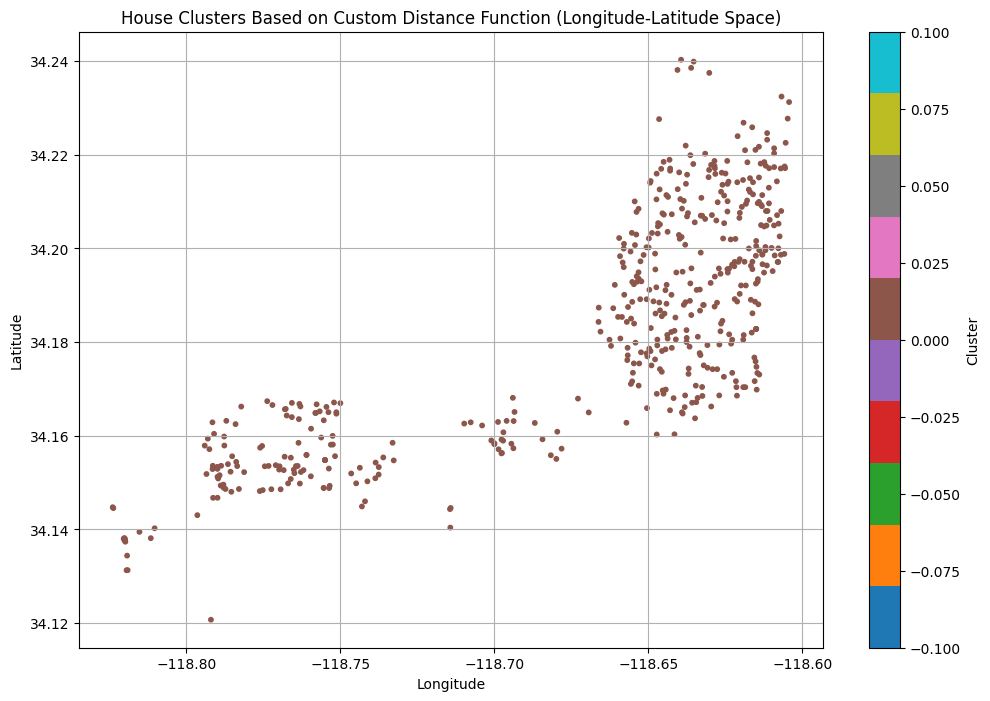

Cluster 0:
           parcelid    latitude   longitude  calculatedfinishedsquarefeet  \
count  5.000000e+02  500.000000  500.000000                    500.000000   
mean   1.073006e+07   34.183065 -118.671460                   2189.130000   
std    9.821274e+03    0.024274    0.063152                   1054.859824   
min    1.071181e+07   34.120721 -118.823910                    471.000000   
25%    1.072185e+07   34.162765 -118.718977                   1563.750000   
50%    1.073033e+07   34.182800 -118.645010                   1939.000000   
75%    1.073878e+07   34.202895 -118.624304                   2541.500000   
max    1.074722e+07   34.240285 -118.604318                   7239.000000   

       bedroomcnt  bathroomcnt  taxvaluedollarcnt    yearbuilt  
count  500.000000   500.000000       5.000000e+02   500.000000  
mean     3.622000     2.660000       4.827064e+05  1970.192000  
std      0.970051     0.960336       3.698306e+05    13.135914  
min      0.000000     0.000000     

In [ ]:
# Step 5: Plot the clusters in longitude-latitude space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(distance_dataframe_sample['longitude'], distance_dataframe_sample['latitude'],
                      c=distance_dataframe_sample['cluster'], cmap='tab10', s=10)  # 'tab10' for distinct colors
plt.colorbar(scatter, label='Cluster')
plt.title('House Clusters Based on Custom Distance Function (Longitude-Latitude Space)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Step 6: Analyze the clusters
for cluster in sorted(distance_dataframe_sample['cluster'].unique()):
    cluster_data = distance_dataframe_sample[distance_dataframe_sample['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data[['parcelid', 'latitude', 'longitude', 'calculatedfinishedsquarefeet',
                        'bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'yearbuilt']].describe())
    print("\n")

**Kmeans**

In [ ]:
# sampled_data = distance_dataframe.sample(n=200, random_state=42)

n_houses = len(distance_dataframe_sample)
distance_matrix = np.zeros((n_houses, n_houses))

weights = {'geo': 0.7, 'property': 0.3}

geo_coords = distance_dataframe_sample[['latitude', 'longitude']].values
max_geo_distance = 0

for i in range(len(geo_coords)):
    for j in range(i + 1, len(geo_coords)):
        dist = geodesic(geo_coords[i], geo_coords[j]).km
        if dist > max_geo_distance:
            max_geo_distance = dist

# print(max_geo_distance)

# Create a distance matrix
n_houses = len(distance_dataframe_sample)
distance_matrix = np.zeros((n_houses, n_houses))

# Fill the distance matrix
for i in range(n_houses):
    for j in range(i + 1, n_houses):
        distance = house_pairwise_distance(distance_dataframe_sample.iloc[i], distance_dataframe_sample.iloc[j], weights, feature_scaler,max_geo_distance)
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance  # Symmetric matrix



In [ ]:
# Perform K-Means clustering
num_clusters = 10  # You can change this number to adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
distance_dataframe_sample['cluster'] = kmeans.fit_predict(distance_matrix)



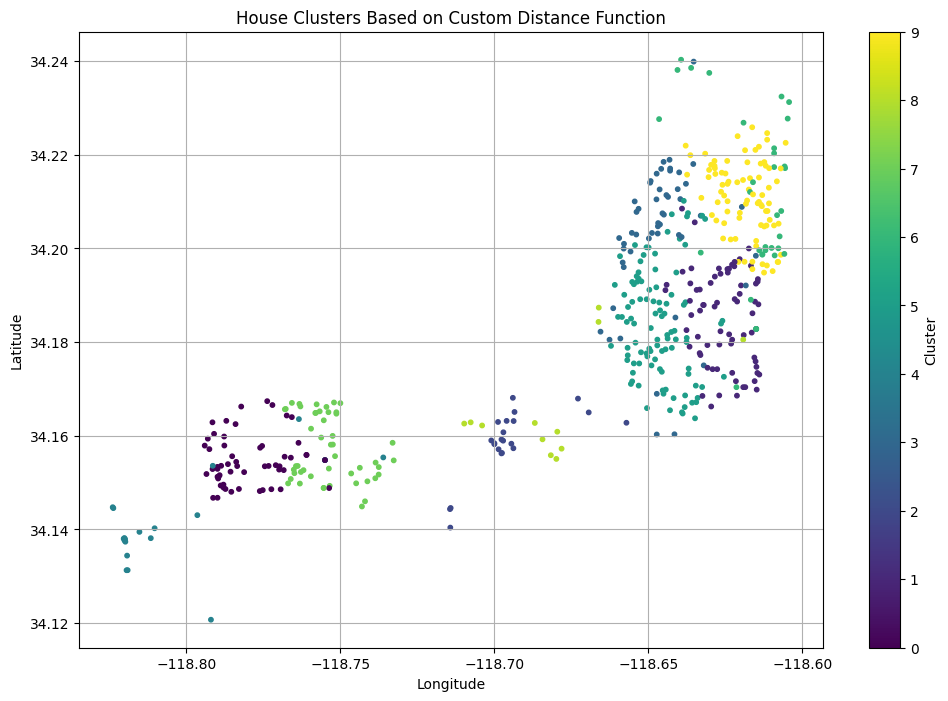

In [ ]:
# Plotting the clusters on a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(distance_dataframe_sample['longitude'], distance_dataframe_sample['latitude'],
                      c=distance_dataframe_sample['cluster'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('House Clusters Based on Custom Distance Function')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# # Analysis of the clusters
# for cluster in range(num_clusters):
#     cluster_data = distance_dataframe_sample[distance_dataframe_sample['cluster'] == cluster]
#     print(f"Cluster {cluster}:")
#     print(cluster_data[['parcelid', 'latitude', 'longitude', 'calculatedfinishedsquarefeet',
#                         'bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'yearbuilt']].describe())
#     print("\n")

ANS)

Ans) I have used a combination of geographic and property-specific variables for the distance function. In the plot there are few points with different colours that intersect with another cluster the reason could be for instance if there is community which has almost similar location their price might be still varing because of an extra bathroom or few extrasquare feets.

## **Q4: Integrating External Data for Price Prediction (15 Points)**


**Identify at least one external data set which you might be able integrate into your price prediction analysis to make it better. Perhaps it can be financial, such as the historical effects of interest rates, consumer confidence, etc. on housing prices. Perhaps it can be geographic, like the crime rate, educational scores, income levels, etc. Discuss whetherthis data helps with the prediction task. (15%)**

**Answer)**The External dataset i chose to use for prediction analysis is the Construction Spending Historical dataset which consists of the   monthly estimates of the total dollar value of construction work done in the U.S. which is published by United States Census Bereau And it can be accesed it through the below link.
https://www.census.gov/construction/c30/prexcel.html

**The Reason** I chose this dataset   because it provides valuable insights into broader economic factors that directly impact property values. The volume of construction activity  can serve as an indicator of market growth or decline, influencing housing demand, availability, and pricing trends. By including this dataset, I can capture important external drivers of property prices, such as fluctuations in material costs, labor demand, and new housing developments.

**Construction Activity Impact**: High levels of construction typically signal economic growth and increased housing supply, which can moderate price increases. Conversely, a decline in construction may reflect economic downturns, leading to a supply-demand imbalance and rising property values.
Temporal Trends: The monthly granularity of the data aligns well with the time-sensitive nature of housing markets, helping to identify how construction cycles influence property values over time.
Local Market Influence: Areas with significant construction activity are likely to experience changes in housing infrastructure, which directly affects property valuation models.
Why I Didn’t Choose Crime Rates:

While crime rates can influence property values, especially at a local level, **I opted not to include them for this analysis for several reasons one among them is the regionidzip  or any other zip based features in the dataset are not up to the mark and are limited to few places so choosing Crime data tends to have a more localized effect on property prices, and its influence may not be as consistently relevant across all regions or timeframes.**

In [ ]:
external_df=pd.read_excel('/content/drive/MyDrive/courses/cse519/homework2/construction_Spending_Historical_Data.xlsx')
external_df['Date'] = pd.to_datetime(external_df['Date'], errors='coerce')
# Extract year and month from the date
external_df['year'] = external_df['Date'].dt.year
external_df['month'] = external_df['Date'].dt.month
external_df.head()


,Date,Construction_Value,year,month
0,2016-12-01,473279,2016,12
1,2016-11-01,471374,2016,11
2,2016-10-01,466621,2016,10
3,2016-09-01,457243,2016,9
4,2016-08-01,462870,2016,8


**Existing Dataset**

In [ ]:
property_2016_df = pd.read_csv("/content/drive/MyDrive/courses/cse519/homework2/properties_2016.csv")
property_2017_df = pd.read_csv("/content/drive/MyDrive/courses/cse519/homework2/properties_2017.csv")


In [ ]:
train_2016_df = pd.read_csv("/content/drive/MyDrive/courses/cse519/homework2/train_2016_v2.csv")
train_2017_df = pd.read_csv("/content/drive/MyDrive/courses/cse519/homework2/train_2017.csv")


In [ ]:
df_2016 = pd.merge(train_2016_df, property_2016_df, how = 'left', on = 'parcelid')
df_2017 = pd.merge(train_2017_df, property_2017_df, how = 'left', on = 'parcelid')
df_train = pd.concat([df_2016,df_2017],axis=0).reset_index(drop=True)

In [ ]:
# drop rows with too many Nan
print(df_train.shape[0])
percent = 75.0
min_count =  int(((100-percent)/100)*df_train.shape[1] + 1)
df_train = df_train.dropna(axis=0, thresh=min_count)
print(df_train.shape[0])


# drop outliers
high = df_train['logerror'].mean() + 2.5*df_train['logerror'].std()
low = df_train['logerror'].mean() - 2.5*df_train['logerror'].std()

df_train = df_train[df_train['logerror'] > low]
df_train = df_train[df_train['logerror'] < high]
print(df_train.shape[0])

167888
167854
164535


In [ ]:
# df_train.nunique(dropna=False)

In [ ]:
df_train['transactiondate'] = pd.to_datetime(df_train['transactiondate'], errors='coerce')

# Extract year, month, and quarter
df_train['month'] = df_train['transactiondate'].dt.month
df_train['quarter'] = df_train['transactiondate'].dt.quarter
df_train['year'] = df_train['transactiondate'].dt.year

# Handle any missing or null transactiondate values
df_train = df_train.dropna(subset=['transactiondate'])  # Remove rows with null dates, if applicable

df_train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,month,quarter,year
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13,1,1,2016
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN,1,1,2016
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13,1,1,2016
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13,1,1,2016
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13,1,1,2016


**Merging The External Dataset**

In [ ]:
merged_df = pd.merge(df_train, external_df, on=['year', 'month'], how='inner')
merged_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,month,quarter,year,Date,Construction_Value
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,237416.0,6735.88,NaN,NaN,6.037107e+13,1,1,2016,2016-01-01,456604
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,239071.0,10153.02,NaN,NaN,NaN,1,1,2016,2016-01-01,456604
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,57912.0,11484.48,NaN,NaN,6.037464e+13,1,1,2016,2016-01-01,456604
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,73362.0,3048.74,NaN,NaN,6.037296e+13,1,1,2016,2016-01-01,456604
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,264977.0,5488.96,NaN,NaN,6.059042e+13,1,1,2016,2016-01-01,456604


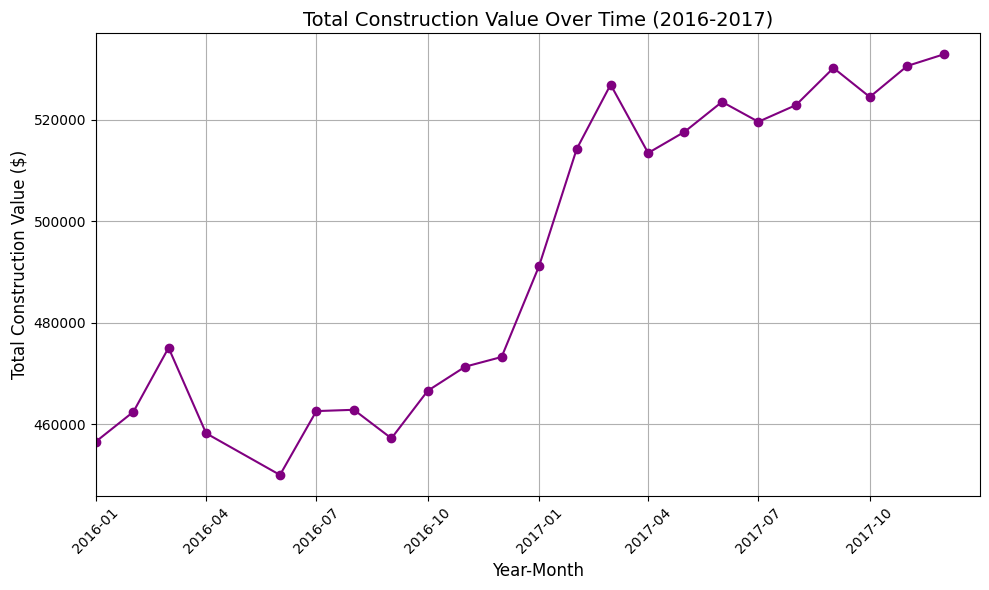

In [ ]:
df=external_df.copy()
df = df[(df['year'] == 2016) | (df['year'] == 2017)]

# Create a 'year-month' column
df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Sort by 'year_month' to ensure proper time order
df = df.sort_values('year_month')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['year_month'], df['Construction_Value'], marker='o',linestyle='-', color='purple')

# Title and labels
plt.title('Total Construction Value Over Time (2016-2017)', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Construction Value ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limits to focus on 2016 and 2017
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2017-12-31'))

# Show grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

merged_df.to_csv('Externalmerged.csv', index=False)


## **Q5: Visualizing Insights from Housing Data (15 Points)**


**Produce three interesting visualizations of something you learn from thehousing data(15%)**

Graph Describing Price per Square Foot Over Time

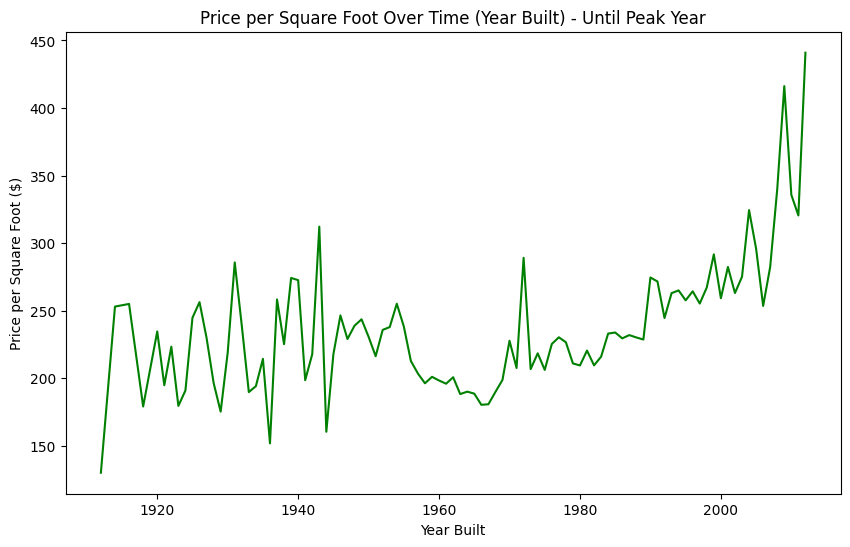

In [ ]:
# Calculate price per square foot
distance_dataframe['price_per_sqft'] = distance_dataframe['taxvaluedollarcnt'] / distance_dataframe['calculatedfinishedsquarefeet']

# Find the peak year for price per square foot
peak_year = distance_dataframe.groupby('yearbuilt')['price_per_sqft'].mean().idxmax()

# Filter data to include only years up to the peak
filtered_data = distance_dataframe[distance_dataframe['yearbuilt'] <= peak_year]

# Create a line plot showing price per square foot over time (stopping at peak)
plt.figure(figsize=(10, 6))
sns.lineplot(x='yearbuilt', y='price_per_sqft', data=filtered_data, ci=None, color='green')

plt.title('Price per Square Foot Over Time (Year Built) - Until Peak Year')
plt.xlabel('Year Built')
plt.ylabel('Price per Square Foot ($)')
plt.show()

**Barplot depicting the buildquality and built decade**

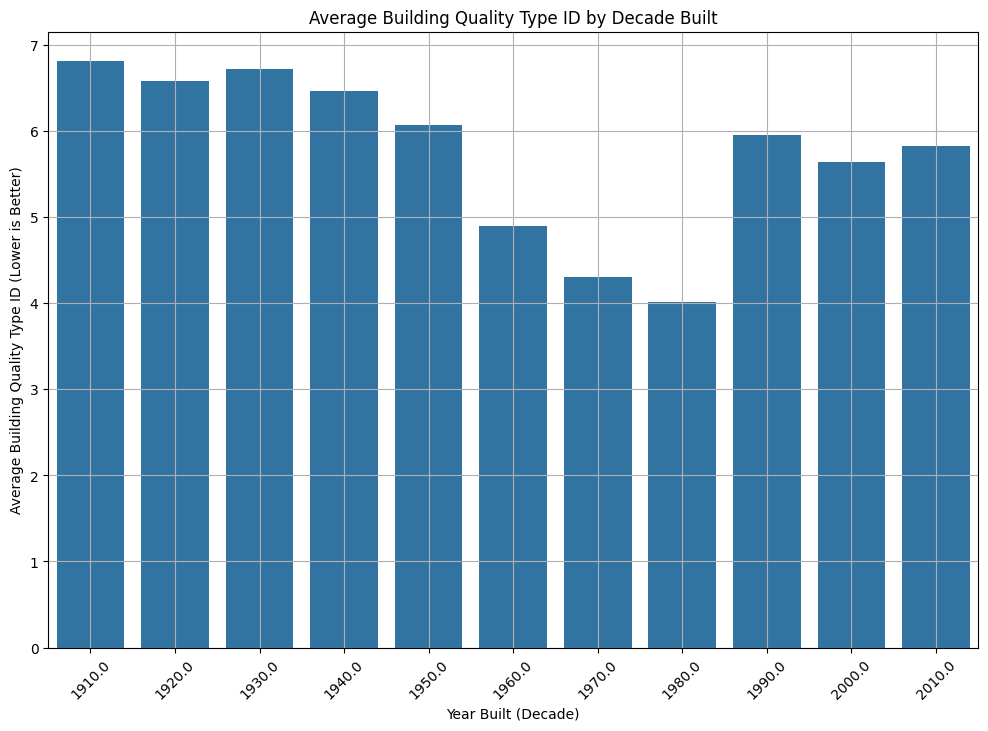

In [ ]:
# yearbuilt , buildingqualitytypeid
temp1=updated_properties.dropna(subset=['yearbuilt', 'buildingqualitytypeid'])


# Create a scatter plot to visualize the relationship
# Bin the year built into decades
temp1['year_built_bin'] = (temp1['yearbuilt'] // 10) * 10

# Aggregate by bins
binned_data = temp1.groupby('year_built_bin')['buildingqualitytypeid'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=binned_data, x='year_built_bin', y='buildingqualitytypeid')
plt.title('Average Building Quality Type ID by Decade Built')
plt.xlabel('Year Built (Decade)')
plt.ylabel('Average Building Quality Type ID (Lower is Better)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Average Tax Assessed Value by Number of Units**

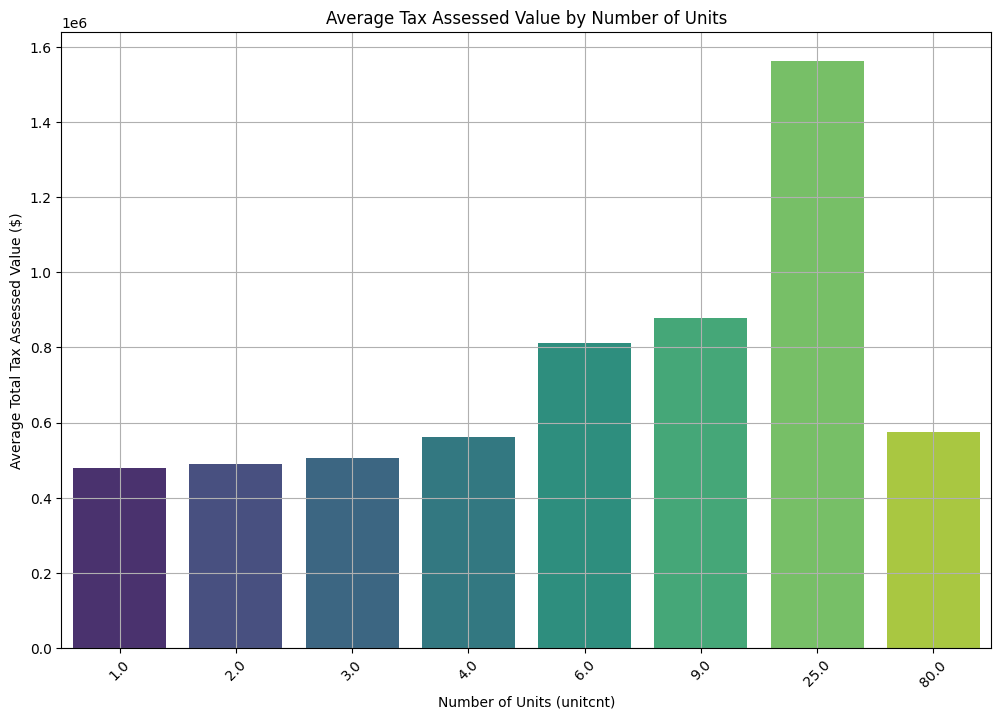

In [ ]:
temp3=updated_properties.dropna(subset=['unitcnt', 'taxvaluedollarcnt'])

aggregated_data = temp3.groupby('unitcnt')['taxvaluedollarcnt'].mean().reset_index()
plt.figure(figsize=(12, 8))

sns.barplot(data=aggregated_data, x='unitcnt', y='taxvaluedollarcnt', palette='viridis')
plt.title('Average Tax Assessed Value by Number of Units')
plt.xlabel('Number of Units (unitcnt)')
plt.ylabel('Average Total Tax Assessed Value ($)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## **Q6: Best Prediction Model for Zillow Logerror (20 Points)**


Finally, build the best prediction model you can to solve the Zillow task. Use any data,
ideas, and approach that you like. Predict the logerror for instances at file
“sample_submission.csv”. Report the score you get when submitting it to Kaggle.
Describe how your model works, give an evaluation, and report any interesting
experiences along the way. (20%)



### Prediction Model Using GradientBoostingRegressor

In [ ]:
# Step 1: Load the datasets
zillow_train_data = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/train_2017.csv', parse_dates=["transactiondate"])
properties = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/properties_2017.csv')  # Assuming we only have properties data
test_data = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/sample_submission.csv')
test_data = test_data.rename(columns={'ParcelId': 'parcelid'})

# Step 2: Merge train and test data with property data
zillow_train_data = zillow_train_data.merge(properties, on='parcelid', how='left')
test_data = test_data.merge(properties, on='parcelid', how='left')

# Step 3: Handle missing values and label encoding


In [ ]:
lbl = LabelEncoder()

# Fill missing values and encode categorical variables for training data
for column in zillow_train_data.columns:
    zillow_train_data[column] = zillow_train_data[column].fillna(0)  # Fill NaNs with 0
    if zillow_train_data[column].dtype == 'object':
        zillow_train_data[column] = lbl.fit_transform(zillow_train_data[column].astype(str))

# Fill missing values and encode categorical variables for test data
for column in test_data.columns:
    test_data[column] = test_data[column].fillna(0)  # Fill NaNs with 0
    if test_data[column].dtype == 'object':
        test_data[column] = lbl.fit_transform(test_data[column].astype(str))



In [ ]:
# Step 4: Define features and target variable for training
zillow_X_train = zillow_train_data.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = zillow_train_data['logerror']

# Ensure the test dataset has only the features that were in training
X_test = test_data[zillow_X_train.columns]

# Step 5: Split training data into train and validation sets
Xtrain, Xvalid, ytrain, yvalid = train_test_split(zillow_X_train, y_train, test_size=0.2, random_state=42)

# Step 6: Train a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42)
gbr_model.fit(Xtrain, ytrain)
# Step 7: Evaluate on the validation set
y_val_pred = gbr_model.predict(Xvalid)
mae_val = mean_absolute_error(yvalid, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(yvalid, y_val_pred))
print(f'Validation MAE: {mae_val}')
print(f'Validation RMSE: {rmse_val}')


Validation MAE: 0.0715469506179633
Validation RMSE: 0.17761812844398003


In [ ]:
# Step 7: Evaluate on the validation set
y_val_pred = gbr_model.predict(Xvalid)
mae_val = mean_absolute_error(yvalid, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(yvalid, y_val_pred))
print(f'Validation MAE: {mae_val}')
print(f'Validation RMSE: {rmse_val}')



Validation MAE: 0.0715469506179633
Validation RMSE: 0.17761812844398003


In [ ]:
# Step 8: Make predictions on the test set
y_test_pred = gbr_model.predict(X_test)

# Step 9: Prepare the submission file
submission_file = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/sample_submission.csv')
for col in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[col] = y_test_pred
print(y_test_pred)
# Save the predictions for submission to Kaggle
submission_file.to_csv('zillow_predictions.csv', index=False, float_format='%.4f')

[ 0.01356004  0.12786683 -0.17312114 ...  0.09126585  0.1089252
  0.09183924]


### Prediction Using XGBRegressor



In [ ]:
# Step 1: Load the datasets
zillow_train_data = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/train_2017.csv', parse_dates=["transactiondate"])
properties = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/properties_2017.csv')  # Assuming we only have properties data
test_data = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/sample_submission.csv')
test_data = test_data.rename(columns={'ParcelId': 'parcelid'})

# Step 2: Merge train and test data with property data
zillow_train_data = zillow_train_data.merge(properties, on='parcelid', how='left')
test_data = test_data.merge(properties, on='parcelid', how='left')

# Step 3: Handle missing values and label encoding

In [ ]:
lbl = LabelEncoder()

# Fill missing values and encode categorical variables for training data
for column in zillow_train_data.columns:
    zillow_train_data[column] = zillow_train_data[column].fillna(0)  # Fill NaNs with 0
    if zillow_train_data[column].dtype == 'object':
        zillow_train_data[column] = lbl.fit_transform(zillow_train_data[column].astype(str))

# Fill missing values and encode categorical variables for test data
for column in test_data.columns:
    test_data[column] = test_data[column].fillna(0)  # Fill NaNs with 0
    if test_data[column].dtype == 'object':
        test_data[column] = lbl.fit_transform(test_data[column].astype(str))

In [ ]:
# Step 4: Define features and target variable for training
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=6, learning_rate=0.01)
zillow_X_train = zillow_train_data.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y_train = zillow_train_data['logerror']

# Ensure the test dataset has only the features that were in training
X_test = test_data[zillow_X_train.columns]

# Step 5: Split training data into train and validation sets
Xtrain, Xvalid, ytrain, yvalid = train_test_split(zillow_X_train, y_train, test_size=0.2, random_state=42)


gbr_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.01,
    random_state=42
)

# Train the model
gbr_model.fit(Xtrain, ytrain)

# Step 6: Train a Gradient Boosting Regressor model
# gbr_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=5, random_state=42)
# gbr_model.fit(Xtrain, ytrain)

# Step 7: Evaluate on the validation set
y_val_pred = gbr_model.predict(Xvalid)
mae_val = mean_absolute_error(yvalid, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(yvalid, y_val_pred))
print(f'Validation MAE: {mae_val}')
print(f'Validation RMSE: {rmse_val}')

Validation MAE: 0.07148134286841575
Validation RMSE: 0.17690160733536034


In [ ]:
# Step 7: Evaluate on the validation set
y_val_pred = gbr_model.predict(Xvalid)
mae_val = mean_absolute_error(yvalid, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(yvalid, y_val_pred))
print(f'Validation MAE: {mae_val}')
print(f'Validation RMSE: {rmse_val}')


Validation MAE: 0.07148134286841575
Validation RMSE: 0.17690160733536034


In [ ]:
# Step 8: Make predictions on the test set
y_test_pred = gbr_model.predict(X_test)

# Step 9: Prepare the submission file
submission_file = pd.read_csv('/content/drive/MyDrive/courses/cse519/homework2/sample_submission.csv')
for col in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[col] = y_test_pred
print(y_test_pred)
# Save the predictions for submission to Kaggle
submission_file.to_csv('zillow_predictions.csv', index=False, float_format='%.4f')

[ 0.32884273  0.10103695 -0.05085827 ...  0.01833132  0.01616649
  0.01746304]


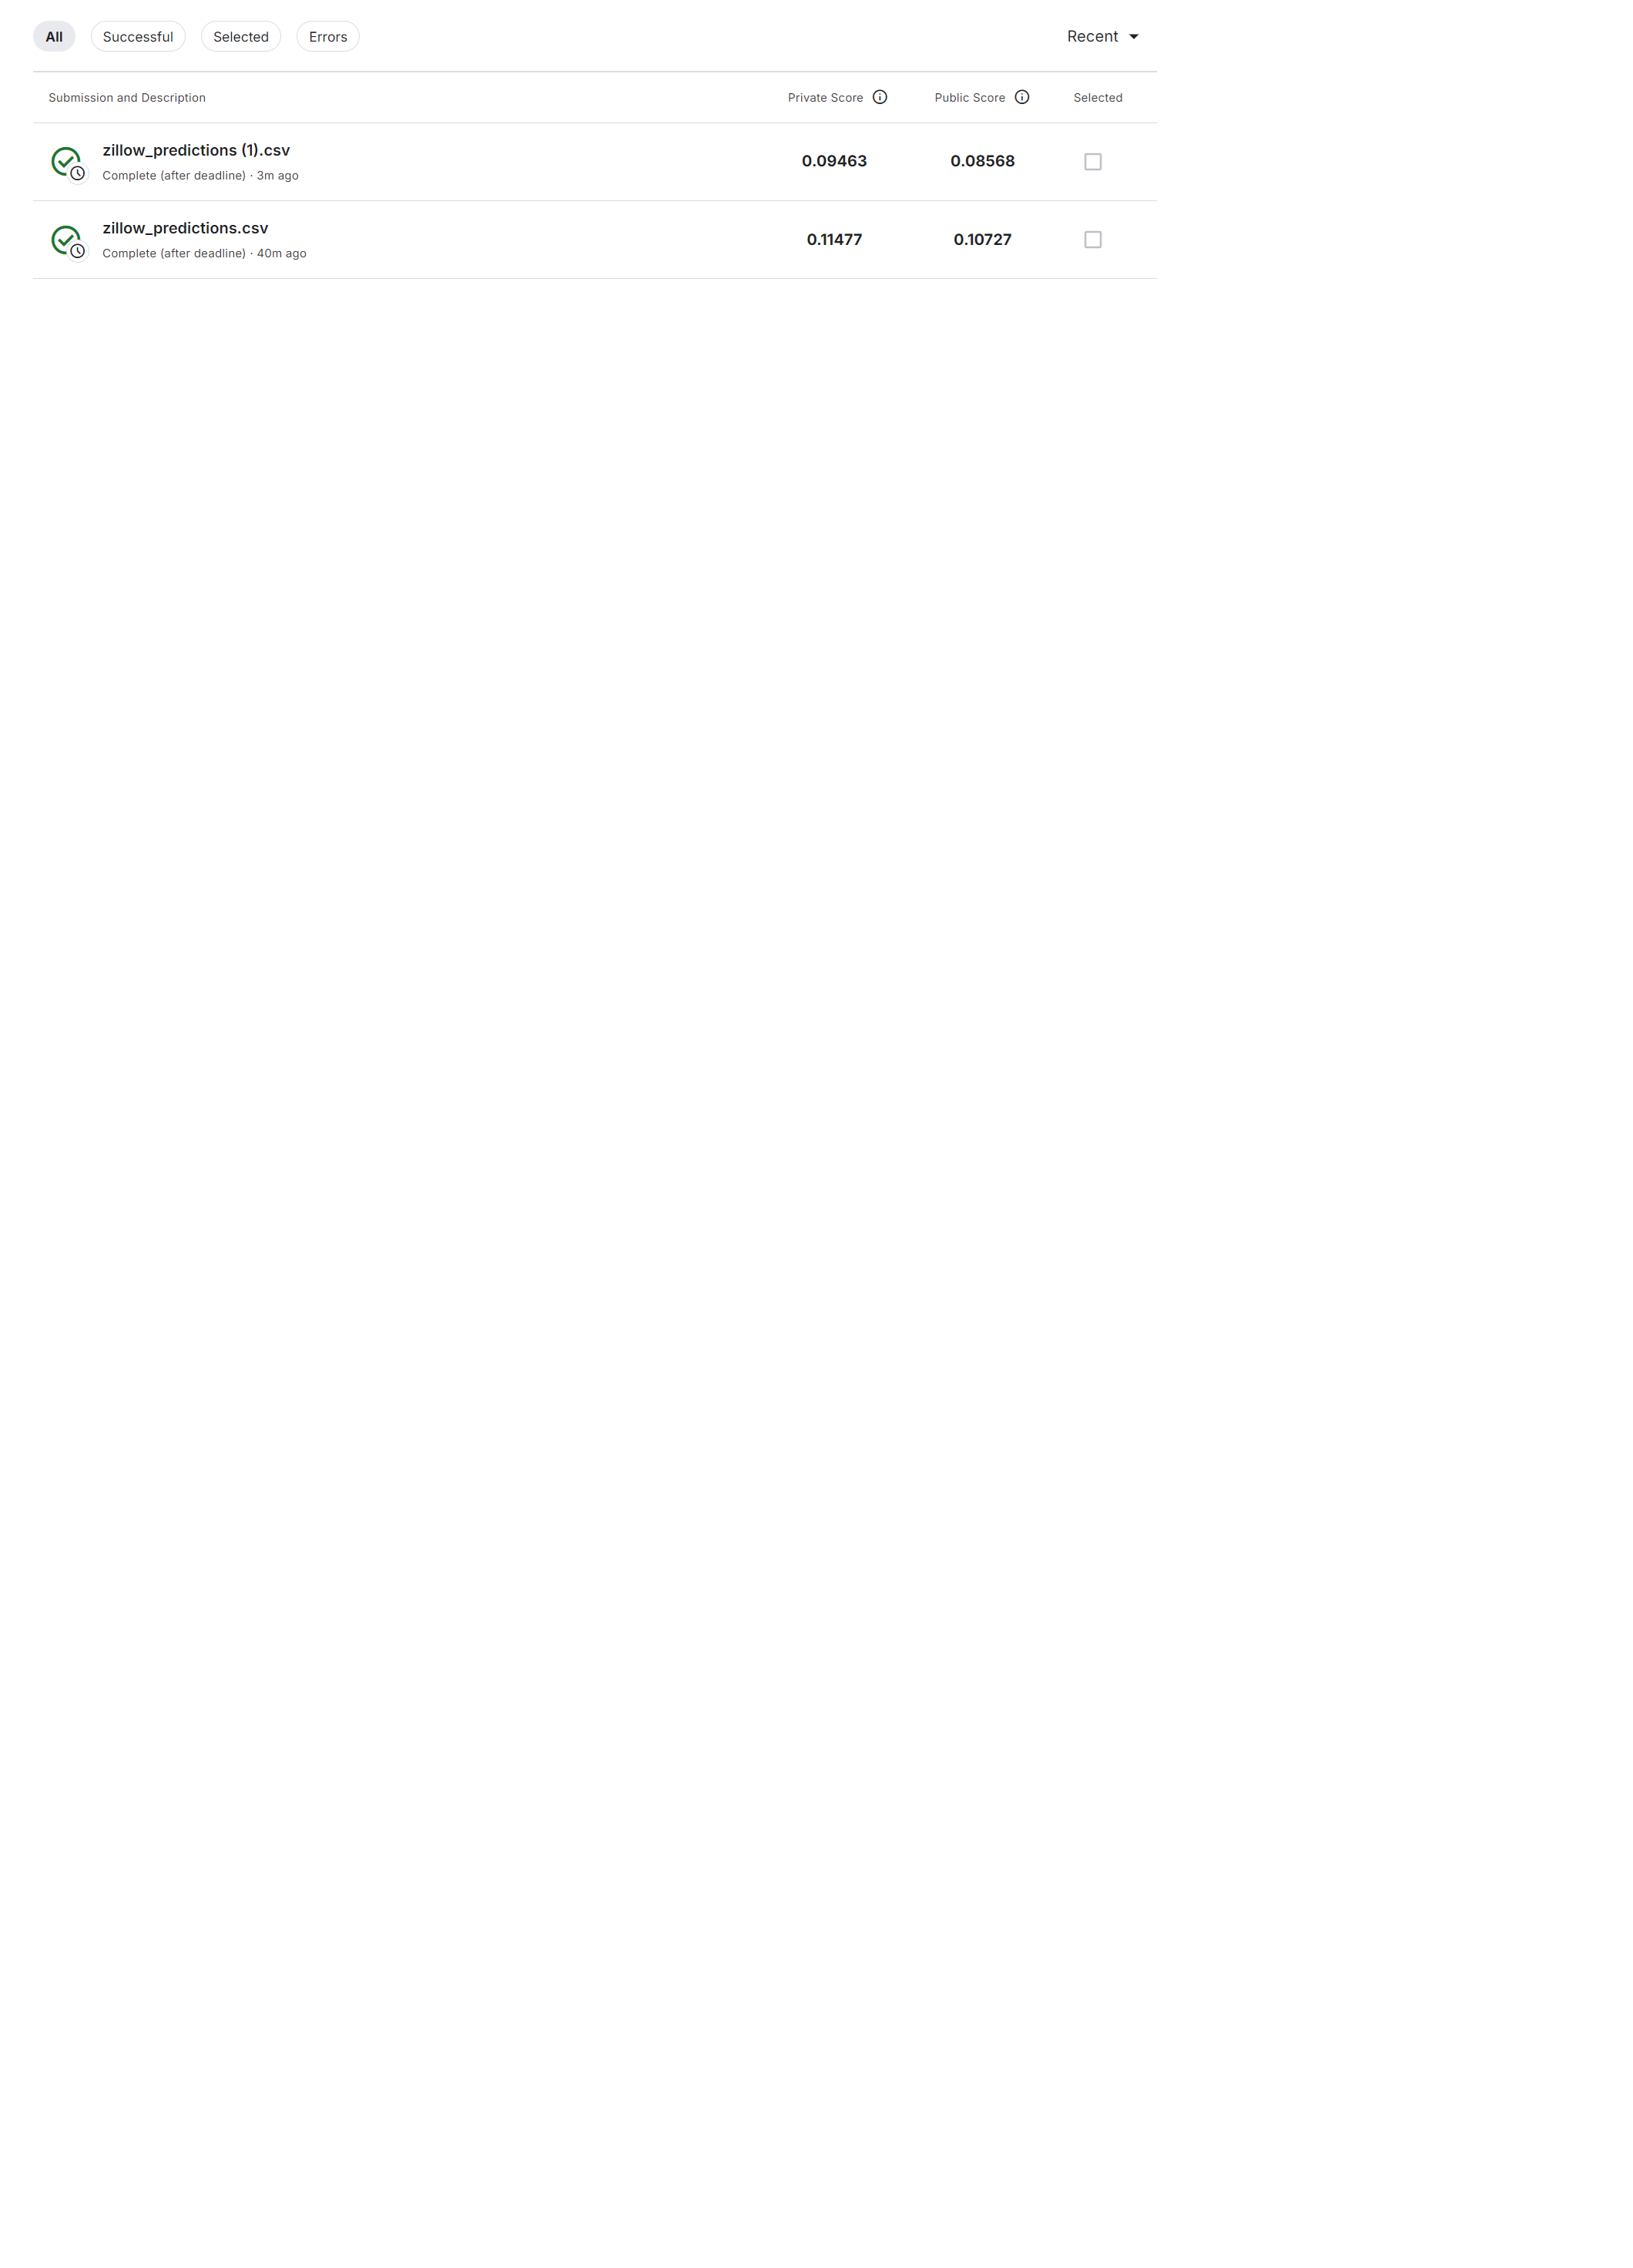

## **Q7: Permutation Test for Logerror Prediction Evaluation (15 Points)**


7. Do a permutation test to determine a p-value of whether your predictions of logerror are
better than chance. You can use whatever metric you wish to score your model (such as
mean absolute error). For a large enough sample of the evaluation data, compare how
your model ranks by this metric on the real data compared to 100 (or more) random
permutations of the logerror assigned to the real data records. What fraction of
permutations produce at least error at least as good at the real data set? If necessary,
subsample your data so these 100+ runs do not take too much time. (15%)

Actual MAE: 0.07148134286841575
P-value: 0.0


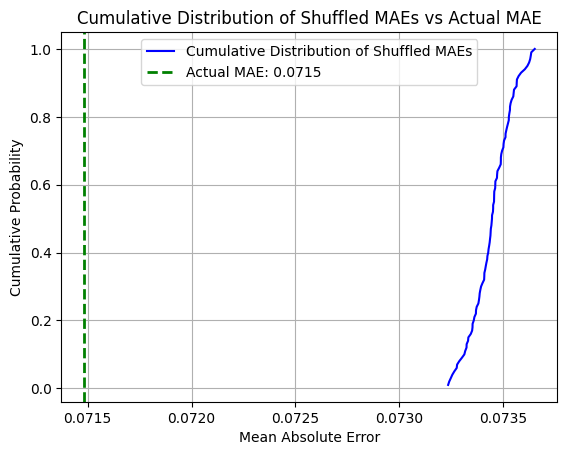

In [ ]:

# Assuming you already have yvalid and y_val_pred
actual_mae = mean_absolute_error(yvalid, y_val_pred)
print(f'Actual MAE: {actual_mae}')

iteration_number = 100  # Set the number of random shuffles
mixed_maes = []  # List to store MAE for each permutation

for i in range(iteration_number):
    # Shuffle the true validation values randomly
    permuted_yvalid = yvalid.sample(frac=1, replace=False).reset_index(drop=True)

    # Compute MAE between shuffled yvalid and original predictions
    per_mae = mean_absolute_error(permuted_yvalid, y_val_pred)

    # Store the permuted MAE in the list
    mixed_maes.append(per_mae)

shuffled_maes = np.array(mixed_maes)
p_value = np.mean(shuffled_maes <= actual_mae)
print(f'P-value: {p_value}')

# Sort the shuffled MAEs for the CDF plot
sorted_maes = np.sort(shuffled_maes)
cumulative_probabilities = np.arange(1, len(sorted_maes)+1) / len(sorted_maes)

# Plot CDF of shuffled MAEs
plt.plot(sorted_maes, cumulative_probabilities, label='Cumulative Distribution of Shuffled MAEs', color='blue')
plt.axvline(actual_mae, color='green', linestyle='--', label=f'Actual MAE: {actual_mae:.4f}', linewidth=2)

# Plot details
plt.xlabel('Mean Absolute Error')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Shuffled MAEs vs Actual MAE')
plt.legend()
plt.grid(True)
plt.show()


## **Submission Guideline:**
- Submit everything through Google classroom. As mentioned above, you will need to upload:
  1. The Jupyter notebook all your work is in (.ipynb file), derived from the provided template
  2. PDF (export the notebook as a pdf file)


- These files should be named with the following format, where the italicized parts should be replaced with the corresponding values:
  1. cse519_hw2_*lastname_firstname_sbuid*.ipynb
  2. cse519_hw2_*lastname_firstname_sbuid*.pdf

Your Submission will  **NOT BE GRADED** if you don't follow the naming convention**❗❗**


Good Luck! (੭˶ᵔ ᵕ ᵔ˶)੭₊˚❀༉‧₊˚